### Sentiment Analysis of Movie Reviews

Shishir Singapura (ssl495)  
Mayank Grover (mg5229)

In [27]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

def read_data(file_dir):
    with open(file_dir) as file:
        data = []
        labels = []
        for line in file:
            labels.append(int(line[0]))
            comment = set(line[2:].strip('\n\t').split(' '))
            data.append(comment)
    return data, labels

def transform(X_test):
    data = X_test
    data_new = []
    for sentence in data:
        list_sentence = []
        for word in vocabulary:
            if word in sentence: list_sentence.append(1)
            else: list_sentence.append(0)
        data_new.append(list_sentence)

    df = pd.DataFrame(columns=vocabulary, data = data_new)
    return df

def topk_ig(k):
    top_ig = sorted(res, key=res.get, reverse=True)[:k]
    df_NN = df[top_ig]
    return top_ig, df_NN 

def sigmoid(x):
  	return 1 / (1 + np.exp(-x))

def bp(I,D,n_hidden,eta,n_max):
    np.random.seed(1926)
    
    r_inp, c_inp = I.shape
    n_examples = r_inp
    n_input    = c_inp
    r_out,c_out = D.shape
    n_output   = c_out

    w = np.random.random((n_input, n_hidden))
    wb = np.random.random(n_hidden)
    v = np.random.random((n_hidden, n_output))
    vb = np.random.random(n_output)
    err_curve = np.zeros((n_max,c_out))

    for n in range(n_max):
        cross_err_sum = np.zeros((1,n_output))
    
        for k in range(n_examples):
            x = I[k,:].reshape([1,-1])
            z = sigmoid(x.dot(w)+wb)
            y = sigmoid(z.dot(v)+vb)
            err = (D[k,:] - y).reshape([1,-1])
            if y <= 0 or (1-y) <=0:
                continue
            cross_err_sum += -(D[k,:]*np.log(y) + (1 - D[k,:])*(np.log((1 - y)))).reshape([1,-1])
            
            Delta_output = err
            Delta_v = z.T.dot(Delta_output)
            Delta_vb = np.sum(Delta_output,axis=0)

            Delta_hidden = Delta_output.dot(v.T)*(1-z)*z
            Delta_w = x.T.dot(Delta_hidden)    
            Delta_wb = np.sum(Delta_hidden,axis=0) 
        
            v += eta*Delta_v
            vb += eta*Delta_vb
            w += eta*Delta_w
            wb += eta*Delta_wb

            err_curve[n] = cross_err_sum/n_examples
    
        print('epoch %d: err %f'%(n,np.mean(cross_err_sum)/n_examples))
    
    plt.plot(np.linspace(0,n_max-1,n_max),np.mean(err_curve,axis=1))        
    plt.show()
    return w,wb,v,vb,err_curve 

def predict(topk_ig):
    test_NN = data_test[topk_ig]
    I = np.array(test_NN)
    x = I.reshape([test_NN.shape[0],-1])
    z = sigmoid(x.dot(w)+wb)
    y = sigmoid(z.dot(v)+vb)
    y = np.where(y > 0.5, 1,0)
    return y

def compute_metrics(y_test, y, labels):
    confusionmatrix = confusion_matrix(y_test, y)
    accuracy = accuracy_score(y_test, y)
    y_zeroR = [1 if labels.count(1) > labels.count(0) else 0] * len(y_test)
    accuracy_zeroR = accuracy_score(y_zeroR, y_test)
    return confusionmatrix, accuracy, accuracy_zeroR

In [23]:
data, labels = read_data('reviewstrain.txt')
vocabulary = set(x for l in data for x in l)
df = transform(data)
print('5 tokens that occur most frequently', [x for x in (df==1).sum().nlargest(5).index])
res = dict(zip(vocabulary, mutual_info_classif(df, labels, discrete_features=True)))
print('Top 5 attributes with highest information gain', sorted(res, key=res.get, reverse=True)[:5])

X_test, y_test = read_data('reviewstest.txt')
data_test = transform(X_test)

5 tokens that occur most frequently ['.', ',', 'the', 'and', 'a']
Top 5 attributes with highest information gain ['bad', 'best', "n't", 'too', 'moving']


epoch 0: err 1.138270
epoch 1: err 0.861618
epoch 2: err 0.791908
epoch 3: err 0.765792
epoch 4: err 0.750283
epoch 5: err 0.739156
epoch 6: err 0.730571
epoch 7: err 0.723785
epoch 8: err 0.718341
epoch 9: err 0.713893
epoch 10: err 0.710166
epoch 11: err 0.706948
epoch 12: err 0.704085
epoch 13: err 0.701466
epoch 14: err 0.699010
epoch 15: err 0.696665
epoch 16: err 0.694396
epoch 17: err 0.692180
epoch 18: err 0.690009
epoch 19: err 0.687881
epoch 20: err 0.685803
epoch 21: err 0.683783
epoch 22: err 0.681836
epoch 23: err 0.679973
epoch 24: err 0.678205
epoch 25: err 0.676536
epoch 26: err 0.674963
epoch 27: err 0.673477
epoch 28: err 0.672066
epoch 29: err 0.670713
epoch 30: err 0.669401
epoch 31: err 0.668114
epoch 32: err 0.666833
epoch 33: err 0.665538
epoch 34: err 0.664210
epoch 35: err 0.662838
epoch 36: err 0.661421
epoch 37: err 0.659971
epoch 38: err 0.658504
epoch 39: err 0.657038
epoch 40: err 0.655586
epoch 41: err 0.654157
epoch 42: err 0.652754
epoch 43: err 0.65138

epoch 346: err 0.586613
epoch 347: err 0.586585
epoch 348: err 0.586556
epoch 349: err 0.586528
epoch 350: err 0.586500
epoch 351: err 0.586472
epoch 352: err 0.586444
epoch 353: err 0.586417
epoch 354: err 0.586389
epoch 355: err 0.586362
epoch 356: err 0.586334
epoch 357: err 0.586307
epoch 358: err 0.586280
epoch 359: err 0.586254
epoch 360: err 0.586227
epoch 361: err 0.586201
epoch 362: err 0.586174
epoch 363: err 0.586148
epoch 364: err 0.586122
epoch 365: err 0.586096
epoch 366: err 0.586070
epoch 367: err 0.586044
epoch 368: err 0.586019
epoch 369: err 0.585993
epoch 370: err 0.585968
epoch 371: err 0.585943
epoch 372: err 0.585917
epoch 373: err 0.585892
epoch 374: err 0.585868
epoch 375: err 0.585843
epoch 376: err 0.585818
epoch 377: err 0.585794
epoch 378: err 0.585769
epoch 379: err 0.585745
epoch 380: err 0.585721
epoch 381: err 0.585697
epoch 382: err 0.585673
epoch 383: err 0.585649
epoch 384: err 0.585625
epoch 385: err 0.585602
epoch 386: err 0.585578
epoch 387: err 0

epoch 690: err 0.580298
epoch 691: err 0.580287
epoch 692: err 0.580276
epoch 693: err 0.580265
epoch 694: err 0.580254
epoch 695: err 0.580243
epoch 696: err 0.580233
epoch 697: err 0.580222
epoch 698: err 0.580211
epoch 699: err 0.580201
epoch 700: err 0.580190
epoch 701: err 0.580180
epoch 702: err 0.580170
epoch 703: err 0.580159
epoch 704: err 0.580149
epoch 705: err 0.580139
epoch 706: err 0.580129
epoch 707: err 0.580119
epoch 708: err 0.580109
epoch 709: err 0.580099
epoch 710: err 0.580089
epoch 711: err 0.580079
epoch 712: err 0.580069
epoch 713: err 0.580060
epoch 714: err 0.580050
epoch 715: err 0.580040
epoch 716: err 0.580031
epoch 717: err 0.580022
epoch 718: err 0.580012
epoch 719: err 0.580003
epoch 720: err 0.579994
epoch 721: err 0.579984
epoch 722: err 0.579975
epoch 723: err 0.579966
epoch 724: err 0.579957
epoch 725: err 0.579948
epoch 726: err 0.579939
epoch 727: err 0.579930
epoch 728: err 0.579921
epoch 729: err 0.579913
epoch 730: err 0.579904
epoch 731: err 0

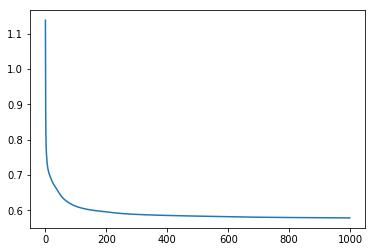

For k= 50  confusionmatrix:  [[104 123]
 [ 43 230]] accuracy:  0.668 accuracy_zeroR:  0.546


In [3]:
top50_ig, df_50 = topk_ig(50)
w,wb,v,vb,err_curve = bp(np.array(df_50), np.array(labels).reshape([-1,1]), 20, 0.2, 1000)
y = predict(top50_ig)
confusionmatrix_50, accuracy_50, accuracy_zeroR_50 = compute_metrics(y_test, y, labels)
print('For k= 50 ','confusionmatrix: ', confusionmatrix_50, 'accuracy: ', accuracy_50, 'accuracy_zeroR: ', accuracy_zeroR_50)

epoch 0: err 1.127726
epoch 1: err 0.894640
epoch 2: err 0.841573
epoch 3: err 0.821868
epoch 4: err 0.811196
epoch 5: err 0.804212
epoch 6: err 0.799196
epoch 7: err 0.795384
epoch 8: err 0.792368
epoch 9: err 0.789905
epoch 10: err 0.787845
epoch 11: err 0.786085
epoch 12: err 0.784553
epoch 13: err 0.783194
epoch 14: err 0.781966
epoch 15: err 0.780838
epoch 16: err 0.779787
epoch 17: err 0.778795
epoch 18: err 0.777848
epoch 19: err 0.776937
epoch 20: err 0.776055
epoch 21: err 0.775200
epoch 22: err 0.774369
epoch 23: err 0.773562
epoch 24: err 0.772779
epoch 25: err 0.772021
epoch 26: err 0.771290
epoch 27: err 0.770588
epoch 28: err 0.769918
epoch 29: err 0.769281
epoch 30: err 0.768677
epoch 31: err 0.768107
epoch 32: err 0.767569
epoch 33: err 0.767061
epoch 34: err 0.766582
epoch 35: err 0.766127
epoch 36: err 0.765696
epoch 37: err 0.765284
epoch 38: err 0.764890
epoch 39: err 0.764511
epoch 40: err 0.764146
epoch 41: err 0.763793
epoch 42: err 0.763450
epoch 43: err 0.76311

epoch 348: err 0.739898
epoch 349: err 0.739882
epoch 350: err 0.739865
epoch 351: err 0.739849
epoch 352: err 0.739832
epoch 353: err 0.739816
epoch 354: err 0.739800
epoch 355: err 0.739784
epoch 356: err 0.739768
epoch 357: err 0.739752
epoch 358: err 0.739736
epoch 359: err 0.739720
epoch 360: err 0.739705
epoch 361: err 0.739689
epoch 362: err 0.739674
epoch 363: err 0.739659
epoch 364: err 0.739643
epoch 365: err 0.739628
epoch 366: err 0.739613
epoch 367: err 0.739598
epoch 368: err 0.739583
epoch 369: err 0.739568
epoch 370: err 0.739554
epoch 371: err 0.739539
epoch 372: err 0.739525
epoch 373: err 0.739510
epoch 374: err 0.739496
epoch 375: err 0.739481
epoch 376: err 0.739467
epoch 377: err 0.739453
epoch 378: err 0.739439
epoch 379: err 0.739425
epoch 380: err 0.739411
epoch 381: err 0.739397
epoch 382: err 0.739384
epoch 383: err 0.739370
epoch 384: err 0.739356
epoch 385: err 0.739343
epoch 386: err 0.739329
epoch 387: err 0.739316
epoch 388: err 0.739303
epoch 389: err 0

epoch 692: err 0.736938
epoch 693: err 0.736935
epoch 694: err 0.736931
epoch 695: err 0.736927
epoch 696: err 0.736923
epoch 697: err 0.736919
epoch 698: err 0.736915
epoch 699: err 0.736911
epoch 700: err 0.736907
epoch 701: err 0.736904
epoch 702: err 0.736900
epoch 703: err 0.736896
epoch 704: err 0.736892
epoch 705: err 0.736888
epoch 706: err 0.736885
epoch 707: err 0.736881
epoch 708: err 0.736877
epoch 709: err 0.736874
epoch 710: err 0.736870
epoch 711: err 0.736866
epoch 712: err 0.736862
epoch 713: err 0.736859
epoch 714: err 0.736855
epoch 715: err 0.736851
epoch 716: err 0.736848
epoch 717: err 0.736844
epoch 718: err 0.736840
epoch 719: err 0.736837
epoch 720: err 0.736833
epoch 721: err 0.736830
epoch 722: err 0.736826
epoch 723: err 0.736822
epoch 724: err 0.736819
epoch 725: err 0.736815
epoch 726: err 0.736812
epoch 727: err 0.736808
epoch 728: err 0.736805
epoch 729: err 0.736801
epoch 730: err 0.736798
epoch 731: err 0.736794
epoch 732: err 0.736790
epoch 733: err 0

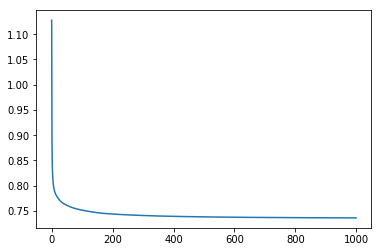

For k= 25  confusionmatrix:  [[ 98 129]
 [ 47 226]] accuracy:  0.648 accuracy_zeroR:  0.546


In [4]:
top25_ig, df_25 = topk_ig(25)
w,wb,v,vb,err_curve = bp(np.array(df_25), np.array(labels).reshape([-1,1]), 20, 0.2, 1000)
y = predict(top25_ig)
confusionmatrix_25, accuracy_25, accuracy_zeroR_25 = compute_metrics(y_test, y, labels)
print('For k= 25 ','confusionmatrix: ', confusionmatrix_25, 'accuracy: ', accuracy_25, 'accuracy_zeroR: ', accuracy_zeroR_25)

epoch 0: err 0.784055
epoch 1: err 0.576550
epoch 2: err 0.521401
epoch 3: err 0.497916
epoch 4: err 0.483809
epoch 5: err 0.473979
epoch 6: err 0.466516
epoch 7: err 0.460589
epoch 8: err 0.455761
epoch 9: err 0.451734
epoch 10: err 0.448273
epoch 11: err 0.445202
epoch 12: err 0.442402
epoch 13: err 0.439798
epoch 14: err 0.437345
epoch 15: err 0.435015
epoch 16: err 0.432792
epoch 17: err 0.430665
epoch 18: err 0.428625
epoch 19: err 0.426660
epoch 20: err 0.424759
epoch 21: err 0.422910
epoch 22: err 0.421100
epoch 23: err 0.419318
epoch 24: err 0.417556
epoch 25: err 0.415810
epoch 26: err 0.414077
epoch 27: err 0.412359
epoch 28: err 0.410658
epoch 29: err 0.408977
epoch 30: err 0.407316
epoch 31: err 0.405675
epoch 32: err 0.404054
epoch 33: err 0.402452
epoch 34: err 0.400871
epoch 35: err 0.399315
epoch 36: err 0.397790
epoch 37: err 0.396300
epoch 38: err 0.394848
epoch 39: err 0.393437
epoch 40: err 0.392064
epoch 41: err 0.390728
epoch 42: err 0.389426
epoch 43: err 0.38815

epoch 347: err 0.331027
epoch 348: err 0.331004
epoch 349: err 0.330982
epoch 350: err 0.330960
epoch 351: err 0.330937
epoch 352: err 0.330915
epoch 353: err 0.330894
epoch 354: err 0.330872
epoch 355: err 0.330850
epoch 356: err 0.330829
epoch 357: err 0.330807
epoch 358: err 0.330786
epoch 359: err 0.330765
epoch 360: err 0.330744
epoch 361: err 0.330723
epoch 362: err 0.330702
epoch 363: err 0.330682
epoch 364: err 0.330661
epoch 365: err 0.330641
epoch 366: err 0.330621
epoch 367: err 0.330601
epoch 368: err 0.330581
epoch 369: err 0.330561
epoch 370: err 0.330541
epoch 371: err 0.330521
epoch 372: err 0.330502
epoch 373: err 0.330482
epoch 374: err 0.330463
epoch 375: err 0.330444
epoch 376: err 0.330425
epoch 377: err 0.330406
epoch 378: err 0.330387
epoch 379: err 0.330368
epoch 380: err 0.330350
epoch 381: err 0.330331
epoch 382: err 0.330313
epoch 383: err 0.330294
epoch 384: err 0.330276
epoch 385: err 0.330258
epoch 386: err 0.330240
epoch 387: err 0.330222
epoch 388: err 0

epoch 689: err 0.326642
epoch 690: err 0.326634
epoch 691: err 0.326626
epoch 692: err 0.326619
epoch 693: err 0.326611
epoch 694: err 0.326604
epoch 695: err 0.326596
epoch 696: err 0.326589
epoch 697: err 0.326581
epoch 698: err 0.326574
epoch 699: err 0.326566
epoch 700: err 0.326559
epoch 701: err 0.326552
epoch 702: err 0.326544
epoch 703: err 0.326537
epoch 704: err 0.326530
epoch 705: err 0.326522
epoch 706: err 0.326515
epoch 707: err 0.326508
epoch 708: err 0.326501
epoch 709: err 0.326494
epoch 710: err 0.326487
epoch 711: err 0.326479
epoch 712: err 0.326472
epoch 713: err 0.326465
epoch 714: err 0.326458
epoch 715: err 0.326451
epoch 716: err 0.326444
epoch 717: err 0.326437
epoch 718: err 0.326430
epoch 719: err 0.326423
epoch 720: err 0.326417
epoch 721: err 0.326410
epoch 722: err 0.326403
epoch 723: err 0.326396
epoch 724: err 0.326389
epoch 725: err 0.326382
epoch 726: err 0.326376
epoch 727: err 0.326369
epoch 728: err 0.326362
epoch 729: err 0.326355
epoch 730: err 0

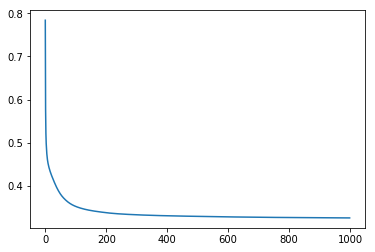

For k= 25  confusionmatrix:  [[121 106]
 [ 52 221]] accuracy:  0.684 accuracy_zeroR:  0.546


In [28]:
top75_ig, df_75 = topk_ig(75)
w,wb,v,vb,err_curve = bp(np.array(df_75), np.array(labels).reshape([-1,1]), 20, 0.2, 1000)
y = predict(top75_ig)
confusionmatrix_75, accuracy_75, accuracy_zeroR_75 = compute_metrics(y_test, y, labels)
print('For k= 25 ','confusionmatrix: ', confusionmatrix_75, 'accuracy: ', accuracy_75, 'accuracy_zeroR: ', accuracy_zeroR_75)

epoch 0: err 0.843968
epoch 1: err 0.566395
epoch 2: err 0.460836
epoch 3: err 0.417592
epoch 4: err 0.392968
epoch 5: err 0.376500
epoch 6: err 0.363893
epoch 7: err 0.353526
epoch 8: err 0.344468
epoch 9: err 0.336262
epoch 10: err 0.328687
epoch 11: err 0.321680
epoch 12: err 0.315193
epoch 13: err 0.309122
epoch 14: err 0.303340
epoch 15: err 0.297711
epoch 16: err 0.292188
epoch 17: err 0.286878
epoch 18: err 0.281883
epoch 19: err 0.277242
epoch 20: err 0.272985
epoch 21: err 0.269125
epoch 22: err 0.265638
epoch 23: err 0.262468
epoch 24: err 0.259552
epoch 25: err 0.256827
epoch 26: err 0.254250
epoch 27: err 0.251786
epoch 28: err 0.249417
epoch 29: err 0.247127
epoch 30: err 0.244904
epoch 31: err 0.242739
epoch 32: err 0.240622
epoch 33: err 0.238549
epoch 34: err 0.236514
epoch 35: err 0.234516
epoch 36: err 0.232558
epoch 37: err 0.230647
epoch 38: err 0.228794
epoch 39: err 0.227011
epoch 40: err 0.225307
epoch 41: err 0.223690
epoch 42: err 0.222164
epoch 43: err 0.22073

epoch 346: err 0.174798
epoch 347: err 0.174760
epoch 348: err 0.174723
epoch 349: err 0.174686
epoch 350: err 0.174650
epoch 351: err 0.174614
epoch 352: err 0.174578
epoch 353: err 0.174542
epoch 354: err 0.174507
epoch 355: err 0.174471
epoch 356: err 0.174436
epoch 357: err 0.174402
epoch 358: err 0.174367
epoch 359: err 0.174333
epoch 360: err 0.174299
epoch 361: err 0.174265
epoch 362: err 0.174231
epoch 363: err 0.174198
epoch 364: err 0.174165
epoch 365: err 0.174132
epoch 366: err 0.174099
epoch 367: err 0.174067
epoch 368: err 0.174034
epoch 369: err 0.174002
epoch 370: err 0.173970
epoch 371: err 0.173939
epoch 372: err 0.173907
epoch 373: err 0.173876
epoch 374: err 0.173844
epoch 375: err 0.173813
epoch 376: err 0.173783
epoch 377: err 0.173752
epoch 378: err 0.173721
epoch 379: err 0.173691
epoch 380: err 0.173661
epoch 381: err 0.173631
epoch 382: err 0.173601
epoch 383: err 0.173571
epoch 384: err 0.173542
epoch 385: err 0.173512
epoch 386: err 0.173483
epoch 387: err 0

epoch 688: err 0.168481
epoch 689: err 0.168473
epoch 690: err 0.168465
epoch 691: err 0.168457
epoch 692: err 0.168449
epoch 693: err 0.168441
epoch 694: err 0.168433
epoch 695: err 0.168425
epoch 696: err 0.168417
epoch 697: err 0.168409
epoch 698: err 0.168402
epoch 699: err 0.168394
epoch 700: err 0.168386
epoch 701: err 0.168378
epoch 702: err 0.168371
epoch 703: err 0.168363
epoch 704: err 0.168355
epoch 705: err 0.168348
epoch 706: err 0.168340
epoch 707: err 0.168332
epoch 708: err 0.168325
epoch 709: err 0.168317
epoch 710: err 0.168310
epoch 711: err 0.168302
epoch 712: err 0.168295
epoch 713: err 0.168287
epoch 714: err 0.168280
epoch 715: err 0.168272
epoch 716: err 0.168265
epoch 717: err 0.168258
epoch 718: err 0.168250
epoch 719: err 0.168243
epoch 720: err 0.168236
epoch 721: err 0.168228
epoch 722: err 0.168221
epoch 723: err 0.168214
epoch 724: err 0.168206
epoch 725: err 0.168199
epoch 726: err 0.168192
epoch 727: err 0.168185
epoch 728: err 0.168178
epoch 729: err 0

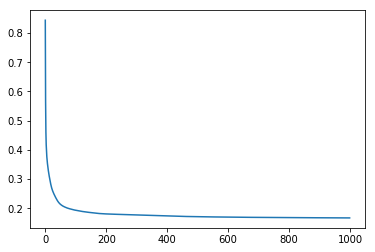

For k= 150  confusionmatrix:  [[127 100]
 [ 51 222]] accuracy:  0.698 accuracy_zeroR:  0.546


In [29]:
top150_ig, df_150 = topk_ig(150)
w,wb,v,vb,err_curve = bp(np.array(df_150), np.array(labels).reshape([-1,1]), 20, 0.2, 1000)
y = predict(top150_ig)
confusionmatrix_150, accuracy_150, accuracy_zeroR_150 = compute_metrics(y_test, y, labels)
print('For k= 150 ','confusionmatrix: ', confusionmatrix_150, 'accuracy: ', accuracy_150, 'accuracy_zeroR: ', accuracy_zeroR_150)

epoch 0: err 0.942202
epoch 1: err 0.583890
epoch 2: err 0.428080
epoch 3: err 0.360770
epoch 4: err 0.321693
epoch 5: err 0.295288
epoch 6: err 0.275952
epoch 7: err 0.260889
epoch 8: err 0.248460
epoch 9: err 0.237713
epoch 10: err 0.228018
epoch 11: err 0.218939
epoch 12: err 0.210458
epoch 13: err 0.202734
epoch 14: err 0.195752
epoch 15: err 0.189391
epoch 16: err 0.183553
epoch 17: err 0.178171
epoch 18: err 0.173158
epoch 19: err 0.168452
epoch 20: err 0.164025
epoch 21: err 0.159852
epoch 22: err 0.155908
epoch 23: err 0.152183
epoch 24: err 0.148688
epoch 25: err 0.145441
epoch 26: err 0.142454
epoch 27: err 0.139723
epoch 28: err 0.137232
epoch 29: err 0.134956
epoch 30: err 0.132869
epoch 31: err 0.130948
epoch 32: err 0.129171
epoch 33: err 0.127520
epoch 34: err 0.125981
epoch 35: err 0.124541
epoch 36: err 0.123189
epoch 37: err 0.121918
epoch 38: err 0.120722
epoch 39: err 0.119595
epoch 40: err 0.118533
epoch 41: err 0.117531
epoch 42: err 0.116587
epoch 43: err 0.11569

epoch 346: err 0.078996
epoch 347: err 0.078978
epoch 348: err 0.078961
epoch 349: err 0.078943
epoch 350: err 0.078926
epoch 351: err 0.078908
epoch 352: err 0.078891
epoch 353: err 0.078874
epoch 354: err 0.078857
epoch 355: err 0.078840
epoch 356: err 0.078824
epoch 357: err 0.078807
epoch 358: err 0.078790
epoch 359: err 0.078774
epoch 360: err 0.078758
epoch 361: err 0.078741
epoch 362: err 0.078725
epoch 363: err 0.078709
epoch 364: err 0.078694
epoch 365: err 0.078678
epoch 366: err 0.078662
epoch 367: err 0.078646
epoch 368: err 0.078631
epoch 369: err 0.078616
epoch 370: err 0.078600
epoch 371: err 0.078585
epoch 372: err 0.078570
epoch 373: err 0.078555
epoch 374: err 0.078540
epoch 375: err 0.078525
epoch 376: err 0.078511
epoch 377: err 0.078496
epoch 378: err 0.078482
epoch 379: err 0.078467
epoch 380: err 0.078453
epoch 381: err 0.078439
epoch 382: err 0.078424
epoch 383: err 0.078410
epoch 384: err 0.078396
epoch 385: err 0.078382
epoch 386: err 0.078369
epoch 387: err 0

epoch 688: err 0.076156
epoch 689: err 0.076152
epoch 690: err 0.076148
epoch 691: err 0.076144
epoch 692: err 0.076140
epoch 693: err 0.076136
epoch 694: err 0.076133
epoch 695: err 0.076129
epoch 696: err 0.076125
epoch 697: err 0.076121
epoch 698: err 0.076117
epoch 699: err 0.076113
epoch 700: err 0.076109
epoch 701: err 0.076106
epoch 702: err 0.076102
epoch 703: err 0.076098
epoch 704: err 0.076094
epoch 705: err 0.076090
epoch 706: err 0.076087
epoch 707: err 0.076083
epoch 708: err 0.076079
epoch 709: err 0.076075
epoch 710: err 0.076072
epoch 711: err 0.076068
epoch 712: err 0.076064
epoch 713: err 0.076061
epoch 714: err 0.076057
epoch 715: err 0.076053
epoch 716: err 0.076050
epoch 717: err 0.076046
epoch 718: err 0.076042
epoch 719: err 0.076039
epoch 720: err 0.076035
epoch 721: err 0.076032
epoch 722: err 0.076028
epoch 723: err 0.076024
epoch 724: err 0.076021
epoch 725: err 0.076017
epoch 726: err 0.076014
epoch 727: err 0.076010
epoch 728: err 0.076007
epoch 729: err 0

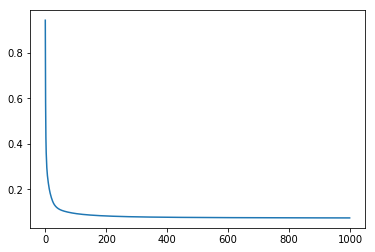

For k= 300  confusionmatrix:  [[163  64]
 [ 68 205]] accuracy:  0.736 accuracy_zeroR:  0.546


In [30]:
top300_ig, df_300 = topk_ig(300)
w,wb,v,vb,err_curve = bp(np.array(df_300), np.array(labels).reshape([-1,1]), 20, 0.2, 1000)
y = predict(top300_ig)
confusionmatrix_300, accuracy_300, accuracy_zeroR_300 = compute_metrics(y_test, y, labels)
print('For k= 300 ','confusionmatrix: ', confusionmatrix_300, 'accuracy: ', accuracy_300, 'accuracy_zeroR: ', accuracy_zeroR_300)

epoch 0: err 1.087649
epoch 1: err 0.776699
epoch 2: err 0.467575
epoch 3: err 0.309103
epoch 4: err 0.226144
epoch 5: err 0.173633
epoch 6: err 0.143930
epoch 7: err 0.124037
epoch 8: err 0.108603
epoch 9: err 0.100279
epoch 10: err 0.090002
epoch 11: err 0.080041
epoch 12: err 0.072895
epoch 13: err 0.067533
epoch 14: err 0.063007
epoch 15: err 0.058943
epoch 16: err 0.055676
epoch 17: err 0.052870
epoch 18: err 0.049925
epoch 19: err 0.047018
epoch 20: err 0.044269
epoch 21: err 0.041745
epoch 22: err 0.039500
epoch 23: err 0.037522
epoch 24: err 0.035770
epoch 25: err 0.034202
epoch 26: err 0.032781
epoch 27: err 0.031490
epoch 28: err 0.030325
epoch 29: err 0.029282
epoch 30: err 0.028355
epoch 31: err 0.027533
epoch 32: err 0.026807
epoch 33: err 0.026167
epoch 34: err 0.025603
epoch 35: err 0.025107
epoch 36: err 0.024671
epoch 37: err 0.024286
epoch 38: err 0.023946
epoch 39: err 0.023644
epoch 40: err 0.023376
epoch 41: err 0.023137
epoch 42: err 0.022923
epoch 43: err 0.02273

epoch 346: err 0.015018
epoch 347: err 0.015014
epoch 348: err 0.015009
epoch 349: err 0.015005
epoch 350: err 0.015001
epoch 351: err 0.014997
epoch 352: err 0.014992
epoch 353: err 0.014988
epoch 354: err 0.014984
epoch 355: err 0.014980
epoch 356: err 0.014975
epoch 357: err 0.014971
epoch 358: err 0.014967
epoch 359: err 0.014963
epoch 360: err 0.014959
epoch 361: err 0.014955
epoch 362: err 0.014951
epoch 363: err 0.014947
epoch 364: err 0.014943
epoch 365: err 0.014939
epoch 366: err 0.014935
epoch 367: err 0.014931
epoch 368: err 0.014927
epoch 369: err 0.014923
epoch 370: err 0.014919
epoch 371: err 0.014915
epoch 372: err 0.014911
epoch 373: err 0.014907
epoch 374: err 0.014904
epoch 375: err 0.014900
epoch 376: err 0.014896
epoch 377: err 0.014892
epoch 378: err 0.014888
epoch 379: err 0.014885
epoch 380: err 0.014881
epoch 381: err 0.014877
epoch 382: err 0.014874
epoch 383: err 0.014870
epoch 384: err 0.014866
epoch 385: err 0.014863
epoch 386: err 0.014859
epoch 387: err 0

epoch 688: err 0.014222
epoch 689: err 0.014221
epoch 690: err 0.014220
epoch 691: err 0.014219
epoch 692: err 0.014217
epoch 693: err 0.014216
epoch 694: err 0.014215
epoch 695: err 0.014214
epoch 696: err 0.014213
epoch 697: err 0.014211
epoch 698: err 0.014210
epoch 699: err 0.014209
epoch 700: err 0.014208
epoch 701: err 0.014207
epoch 702: err 0.014205
epoch 703: err 0.014204
epoch 704: err 0.014203
epoch 705: err 0.014202
epoch 706: err 0.014201
epoch 707: err 0.014200
epoch 708: err 0.014198
epoch 709: err 0.014197
epoch 710: err 0.014196
epoch 711: err 0.014195
epoch 712: err 0.014194
epoch 713: err 0.014193
epoch 714: err 0.014191
epoch 715: err 0.014190
epoch 716: err 0.014189
epoch 717: err 0.014188
epoch 718: err 0.014187
epoch 719: err 0.014186
epoch 720: err 0.014185
epoch 721: err 0.014183
epoch 722: err 0.014182
epoch 723: err 0.014181
epoch 724: err 0.014180
epoch 725: err 0.014179
epoch 726: err 0.014178
epoch 727: err 0.014177
epoch 728: err 0.014176
epoch 729: err 0

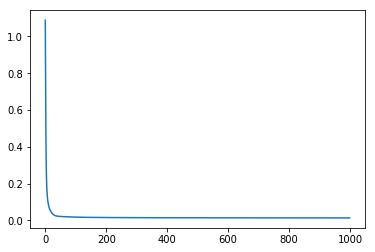

For k= 1000  confusionmatrix:  [[181  46]
 [ 78 195]] accuracy:  0.752 accuracy_zeroR:  0.546


In [33]:
top1000_ig, df_1000 = topk_ig(1000)
w,wb,v,vb,err_curve = bp(np.array(df_1000), np.array(labels).reshape([-1,1]), 20, 0.2, 1000)
y = predict(top1000_ig)
confusionmatrix_1000, accuracy_1000, accuracy_zeroR_1000 = compute_metrics(y_test, y, labels)
print('For k= 1000 ','confusionmatrix: ', confusionmatrix_1000, 'accuracy: ', accuracy_1000, 'accuracy_zeroR: ', accuracy_zeroR_1000)

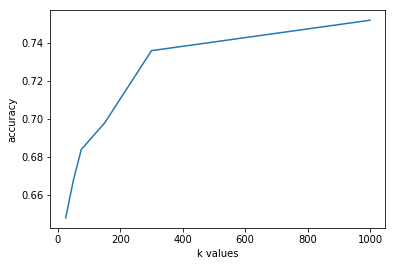

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy_list = [accuracy_25, accuracy_50, accuracy_75, accuracy_150, accuracy_300, accuracy_1000]
k_list = [25, 50, 75, 150, 300, 1000]

plt.plot(k_list, accuracy_list)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()